### Data Exploration 

This notebook evaluates the data logged by the STCV application.  The investigation is a look at the data produced and used internally by the application. This notebook reviews the data looking for opportunities to apply machine learning. The notebook surveys the data and looks for points of correspondence the could then be feed to a machine learning algorithm. 

First we import the minimum number of libraries need to get started:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

This notebook will inspect the data logged to **A_dorian_bpm100_00_motion.csv**.

In [2]:
data_path = "renderExamples/A_dorian_bpm100_00_motion.csv"

### Basic Data Evaluation
The data contains UUID which acts a surrogate primary key.  The first column in the data contains that value.  Since UUID is guaranteed to be unique, the column is brought in as an index column. Here the data is read in using Pandas to create a Pandas dataframe. 

In [3]:
df = pd.read_csv(data_path, index_col=0)

Using the Pandas `head()` function, we can get a quick understanding of the data columns. Note the first column UUID will be ignored for the rest of this document

In [4]:
df.head()

,ticks,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,r,theta,phi
b4774b2f-9828-4afe-ba1b-f50c90915f59,19603,95,287,991,-600,300,-300,-73,-195,-375,1036.09,16.97,71.68
f87b29e8-f33b-4eae-8c56-188c7de94e52,19622,94,289,991,-900,600,0,-70,-192,-372,1036.55,17.05,71.98
4758d505-1495-4eda-b52c-6525e5061f83,19641,96,291,992,-800,200,0,-66,-195,-387,1038.25,17.17,71.74
c025c7bb-9044-4529-a278-7f098bedc5e9,19659,96,288,991,-900,200,0,-73,-207,-380,1036.46,17.03,71.57
61ace984-cb04-4f51-ad47-8f41af946378,19678,95,289,988,-800,200,0,-78,-195,-386,1033.77,17.11,71.80


Running the Pandas dataframe `info()` method we can inspect the datatypes in the columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 677 entries, b4774b2f-9828-4afe-ba1b-f50c90915f59 to 0543db73-2bda-488e-86f2-1ea06ff17180
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticks   677 non-null    int64  
 1   acc_x   677 non-null    int64  
 2   acc_y   677 non-null    int64  
 3   acc_z   677 non-null    int64  
 4   gyr_x   677 non-null    int64  
 5   gyr_y   677 non-null    int64  
 6   gyr_z   677 non-null    int64  
 7   mag_x   677 non-null    int64  
 8   mag_y   677 non-null    int64  
 9   mag_z   677 non-null    int64  
 10  r       677 non-null    float64
 11  theta   677 non-null    float64
 12  phi     677 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 74.0+ KB


In [6]:
df.describe()

,ticks,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,r,theta,phi
count,677.000000,677.000000,677.000000,677.000000,677.000000,6.770000e+02,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000
mean,25908.781388,-76.967504,-18.423929,408.484490,2270.310192,-4.908124e+03,-6575.036928,-137.840473,148.042836,-203.153619,1270.681300,60.710192,13.092570
std,5459.251625,799.335905,650.787035,838.590566,171400.707854,2.123500e+05,177637.793037,210.517427,236.935389,261.544564,567.498981,47.659364,111.877363
min,-32758.000000,-1998.000000,-1998.000000,-1997.000000,-748300.000000,-1.086700e+06,-979300.000000,-510.000000,-412.000000,-564.000000,345.060000,0.360000,-179.760000
25%,22828.000000,-487.000000,-278.000000,-149.000000,-44500.000000,-6.710000e+04,-44000.000000,-298.000000,-18.000000,-384.000000,981.230000,11.500000,-83.880000
50%,26141.000000,-36.000000,107.000000,686.000000,-800.000000,2.000000e+02,0.000000,-180.000000,226.000000,-317.000000,1034.800000,51.160000,33.660000
75%,29453.000000,279.000000,258.000000,1021.000000,44000.000000,5.290000e+04,37800.000000,-3.000000,292.000000,-5.000000,1338.410000,97.950000,103.180000
max,32759.000000,1998.000000,1997.000000,1998.000000,732600.000000,1.346000e+06,900300.000000,468.000000,561.000000,362.000000,3459.480000,177.630000,180.000000


### Checking for Nulls
The following checks to see if we have any nulls in our data.  This situation would need to be remedied if any null data was found be substituting a default value, such as zero. 

In [7]:
print(df.isnull().sum())

ticks    0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
r        0
theta    0
phi      0
dtype: int64


### Calculate Correlation Tables
Now that the data has been confirmed as valid, we are ready to move on to the next step. The current dataset has 12 features, for our purposes we do not want to use all of these features for model training. Rather, we want to choose those features that most directly influence the result. To simplify this, we first usethe `corr()` function. (Lee, 2019) The `corr()` function computes the pairwise correlation of columns: 


In [8]:
corr = df.corr(method='pearson')
print(corr)

          ticks     acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
ticks  1.000000 -0.060887  0.038376  0.035848 -0.014206  0.057105 -0.005848   
acc_x -0.060887  1.000000 -0.051086  0.042252  0.083262  0.005255  0.001624   
acc_y  0.038376 -0.051086  1.000000  0.061457 -0.033205  0.053376 -0.052619   
acc_z  0.035848  0.042252  0.061457  1.000000 -0.090369  0.045514  0.009152   
gyr_x -0.014206  0.083262 -0.033205 -0.090369  1.000000  0.109799 -0.129988   
gyr_y  0.057105  0.005255  0.053376  0.045514  0.109799  1.000000 -0.029918   
gyr_z -0.005848  0.001624 -0.052619  0.009152 -0.129988 -0.029918  1.000000   
mag_x -0.039108 -0.065360 -0.410044 -0.235199  0.001862 -0.068833  0.031205   
mag_y  0.134404 -0.544599 -0.000870 -0.012616  0.123607  0.046232 -0.046217   
mag_z  0.030779 -0.047972  0.114888 -0.661749  0.020872  0.010370  0.027743   
r     -0.035056  0.019349 -0.146211 -0.091662  0.045941  0.040297  0.010301   
theta -0.000136 -0.056503 -0.089391 -0.892630  0.046

As a contrast, a correlation using the Kendall method is computed here.  However, for the rest of the experiments, we rely on the Pearson method.

In [9]:
print(df.corr(method ='kendall'))

          ticks     acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
ticks  1.000000 -0.042696  0.001042  0.085650 -0.017296  0.033122  0.008413   
acc_x -0.042696  1.000000  0.033479  0.052038 -0.011252  0.023722  0.036985   
acc_y  0.001042  0.033479  1.000000  0.031751 -0.000084  0.018985 -0.010039   
acc_z  0.085650  0.052038  0.031751  1.000000 -0.041813  0.064642 -0.025016   
gyr_x -0.017296 -0.011252 -0.000084 -0.041813  1.000000  0.040091 -0.032003   
gyr_y  0.033122  0.023722  0.018985  0.064642  0.040091  1.000000 -0.060550   
gyr_z  0.008413  0.036985 -0.010039 -0.025016 -0.032003 -0.060550  1.000000   
mag_x -0.044303 -0.048045 -0.362727 -0.181629 -0.014905 -0.029831  0.016340   
mag_y  0.133425 -0.446944 -0.027719 -0.006169  0.081023  0.001473 -0.014169   
mag_z -0.009997 -0.038013  0.151810 -0.448494  0.014317 -0.021694  0.040934   
r     -0.065666  0.015036 -0.052821  0.111336 -0.033871 -0.000803  0.027518   
theta -0.048329 -0.060868 -0.032555 -0.759339  0.030

A _positive correlation_ is a relationship between two variables in which both variables move in tandem. A positive correlation exists when one variable decreases as the other variable decreases, or one variable increases while the other variable increases. Similarly, a _negative correlation_ is a relationship between two variables in which one variable increases as the other decreases. A perfect negative correlation is represented by the value –1.00: a 0.00 indicates no correlation and a +1.00 indicates a perfect positive correlation.(Lee, 2019)

### Correlations Reviewed
We have started with the assumption that $r$ or $\rho$, $\theta$ theta, $\phi$ phi, had the highest likelihood of having meaninful correlations. Beginning with $\rho$, we will look for the features that have the highest correlation with that feature. First, we are going to look for correlations with $\rho$.

$$
\rho = \sqrt{x^2 + y^2 + z^2}
$$
$$ 
\theta = \arccos \left(\frac{acc_z}{\rho} \right) \\
\\
$$
$$
\phi = \arctan \left(\frac{acc_y}{acc_x}  \right)
$$



### Absolute Correlations
First, we review the top absolute correlations

In [10]:
# Derived from https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

import pandas as pd

print("Correlation Matrix")
print(df.corr())
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))


Correlation Matrix
          ticks     acc_x     acc_y     acc_z     gyr_x     gyr_y     gyr_z  \
ticks  1.000000 -0.060887  0.038376  0.035848 -0.014206  0.057105 -0.005848   
acc_x -0.060887  1.000000 -0.051086  0.042252  0.083262  0.005255  0.001624   
acc_y  0.038376 -0.051086  1.000000  0.061457 -0.033205  0.053376 -0.052619   
acc_z  0.035848  0.042252  0.061457  1.000000 -0.090369  0.045514  0.009152   
gyr_x -0.014206  0.083262 -0.033205 -0.090369  1.000000  0.109799 -0.129988   
gyr_y  0.057105  0.005255  0.053376  0.045514  0.109799  1.000000 -0.029918   
gyr_z -0.005848  0.001624 -0.052619  0.009152 -0.129988 -0.029918  1.000000   
mag_x -0.039108 -0.065360 -0.410044 -0.235199  0.001862 -0.068833  0.031205   
mag_y  0.134404 -0.544599 -0.000870 -0.012616  0.123607  0.046232 -0.046217   
mag_z  0.030779 -0.047972  0.114888 -0.661749  0.020872  0.010370  0.027743   
r     -0.035056  0.019349 -0.146211 -0.091662  0.045941  0.040297  0.010301   
theta -0.000136 -0.056503 -0.0893

Looking at the correlation another way, we can sort the correlations to show where the highest correlations exist. Of course the correletion of a feature with itself is equal to one. However, that data is listed below to show the relative correlations of the other features. 

In [11]:
# Create correlation matrix

corr_mat = df.corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values()
print(type(sorted_mat))

series_sorted_mat = pd.Series(sorted_mat)
df2 = series_sorted_mat.to_frame()
df2.tail(n=25)


<class 'pandas.core.series.Series'>


0
phi   acc_z  0.135607
acc_z phi    0.135607
mag_z r      0.156185
r     mag_z  0.156185
      theta  0.196402
theta r      0.196402
      mag_x  0.277053
mag_x theta  0.277053
phi   acc_y  0.556620
acc_y phi    0.556620
mag_z theta  0.769826
theta mag_z  0.769826
ticks ticks  1.000000
gyr_z gyr_z  1.000000
r     r      1.000000
mag_z mag_z  1.000000
mag_y mag_y  1.000000
mag_x mag_x  1.000000
gyr_y gyr_y  1.000000
gyr_x gyr_x  1.000000
acc_z acc_z  1.000000
acc_y acc_y  1.000000
acc_x acc_x  1.000000
theta theta  1.000000
phi   phi    1.000000

In [12]:
#---get the top 3 features that has the highest correlation---
print(df.corr().abs().nlargest(3, 'r').index)

#---print the top 3 correlation values---
print(df.corr().abs().nlargest(3, 'r').values[:,10])

Index(['r', 'theta', 'mag_z'], dtype='object')
[1.         0.19640233 0.15618536]


In the case of $r$, a high correlation exists between $r$ or $\rho$ and the $\theta$ (theta) and $mag_z$ features. Having determined the two features with the highest correlation with $r$ are $\theta$ and $mag_z$, we plot each against $r$. Starting with $\theta$, we see the following plot of $r$ versus $\theta$. 

Text(0, 0.5, 'theta')

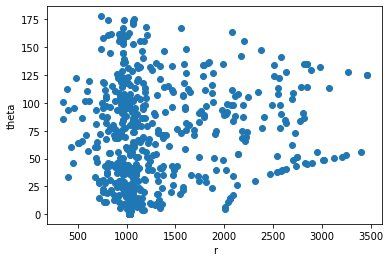

In [13]:
%matplotlib inline

plt.scatter(df['r'], df['theta'], marker='o')
plt.xlabel('r')
plt.ylabel('theta')

Text(0, 0.5, 'mag_z')

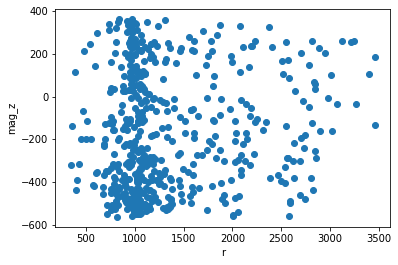

In [14]:
%matplotlib inline

plt.scatter(df['r'], df['mag_z'], marker='o')
plt.xlabel('r')
plt.ylabel('mag_z')

Here the relationship of $r$, $\theta$, and $mag_z$ is explored.  No significant conclusions can be drawn here

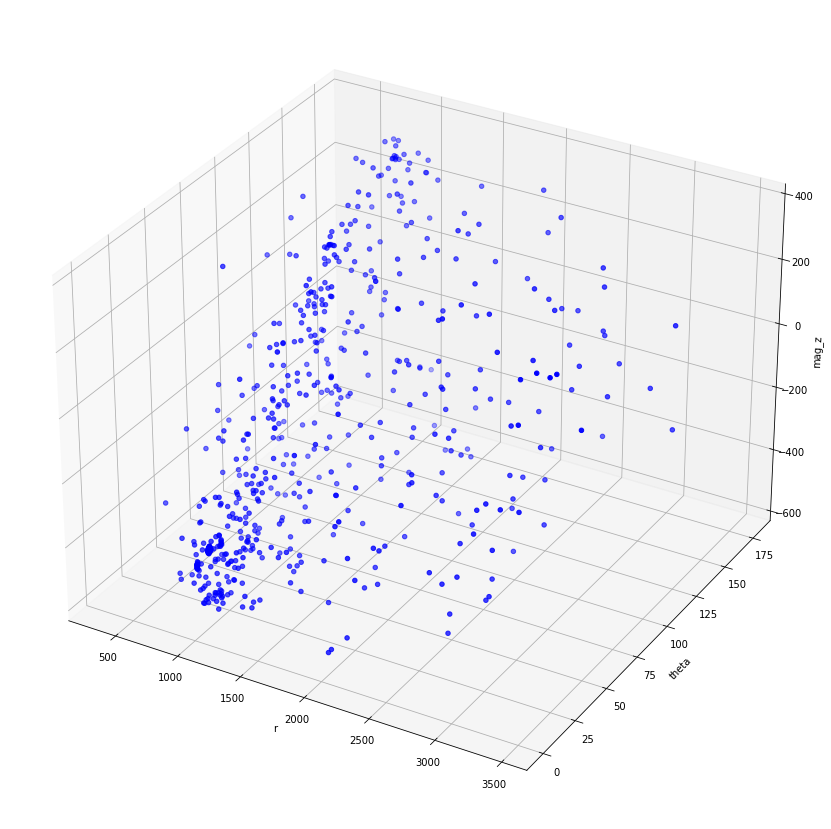

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['r'],
           df['theta'],
           df['mag_z'],
           c='b')

ax.set_xlabel("r")
ax.set_ylabel("theta")
ax.set_zlabel("mag_z")
plt.show()


In [16]:
print(df.corr().abs().nlargest(3, 'theta').index)
print(df.corr().abs().nlargest(3, 'theta').values[:,11])

Index(['theta', 'acc_z', 'mag_z'], dtype='object')
[1.         0.89262984 0.76982648]


$\theta$ has $acc_z$ as component.  Hence the following graph is unsurprising in the clear influence $acc_z$ has on the output of $\theta$

Text(0.5, 1.0, 'Theta vs Acceleration z')

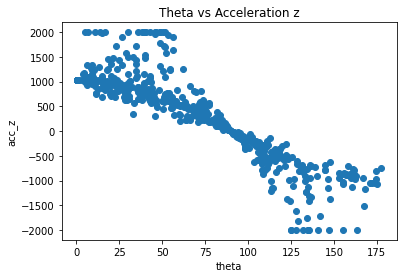

In [17]:
%matplotlib inline

plt.scatter(df['theta'], df['acc_z'], marker='o')
plt.xlabel('theta')
plt.ylabel('acc_z')
plt.title('Theta vs Acceleration z')

Text(0.5, 1.0, '')

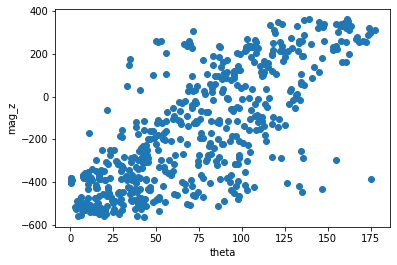

In [18]:
%matplotlib inline

plt.scatter(df['theta'], df['mag_z'], marker='o')
plt.xlabel('theta')
plt.ylabel('mag_z')
plt.title('')

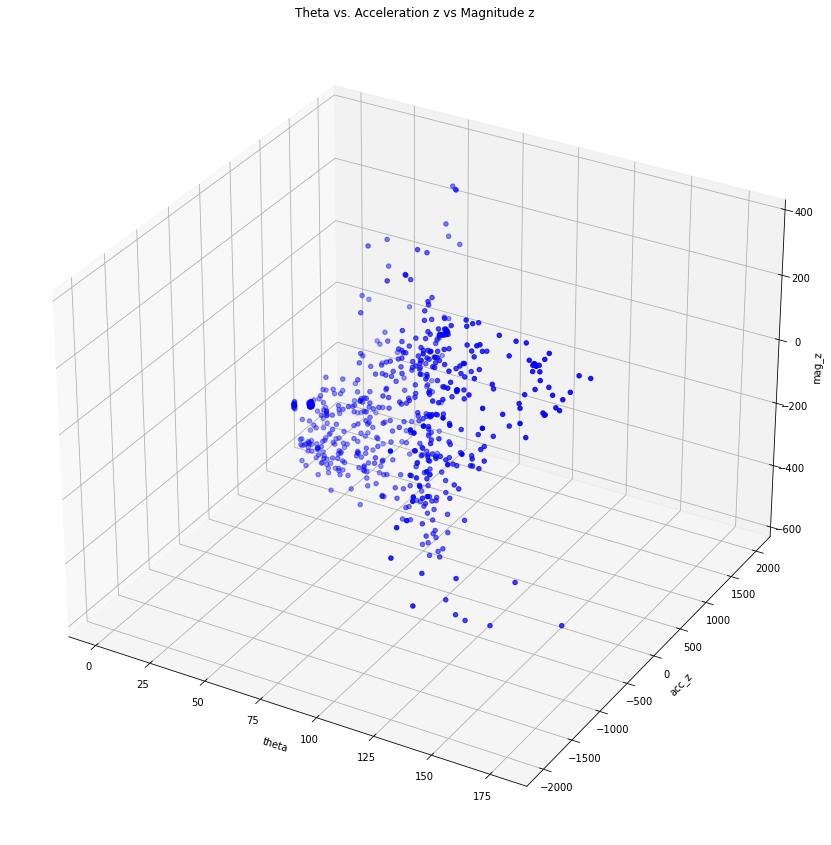

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['theta'],
           df['acc_z'],
           df['mag_z'],
           c='b')

ax.set_xlabel("theta")
ax.set_ylabel("acc_z")
ax.set_zlabel("mag_z")
plt.title("Theta vs. Acceleration z vs Magnitude z")
plt.show()


In [20]:
print(df.corr().abs().nlargest(3, 'phi').index)
print(df.corr().abs().nlargest(3, 'phi').values[:,12])

Index(['phi', 'acc_y', 'mag_x'], dtype='object')
[1.         0.55662038 0.45546074]


Text(0, 0.5, 'acc_y')

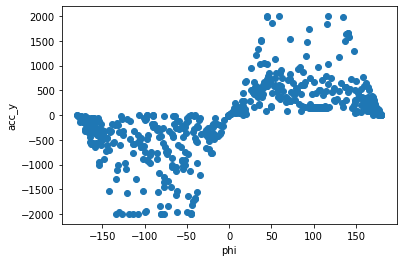

In [21]:
%matplotlib inline

plt.scatter(df['phi'], df['acc_y'], marker='o')
plt.xlabel('phi')
plt.ylabel('acc_y')

The following graph is interesting since it indicates a relationship between the $acc_x$ and $\phi$

Text(0, 0.5, 'acc_x')

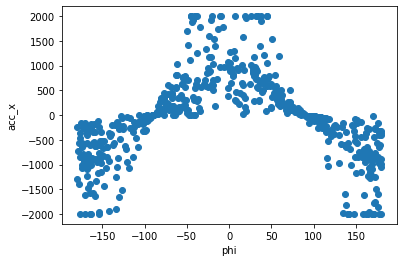

In [22]:
%matplotlib inline

plt.scatter(df['phi'], df['acc_x'], marker='o')
plt.xlabel('phi')
plt.ylabel('acc_x')

By chance, it was noticed that there was a strong relation between $\phi$, $acc_y$, and $acc_x$. Hence we get an inkling of the trigometric realities that influence $\phi$. This finding is significant as it points to what types of machine learning may or may not be possible. 

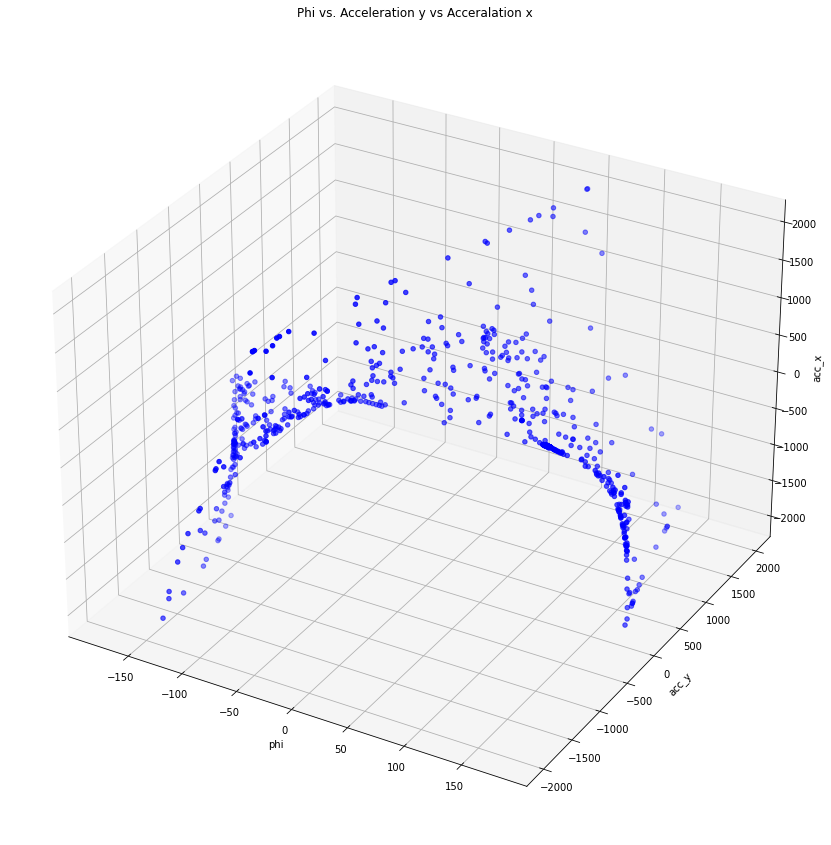

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['phi'],
           df['acc_y'],
           df['acc_x'],
           c='b')

ax.set_xlabel("phi")
ax.set_ylabel("acc_y")
ax.set_zlabel("acc_x")
plt.title("Phi vs. Acceleration y vs Acceralation x")
plt.show()

Rotating the coordinate perspective, we can see a clear delination of the trignometric functions at work. 

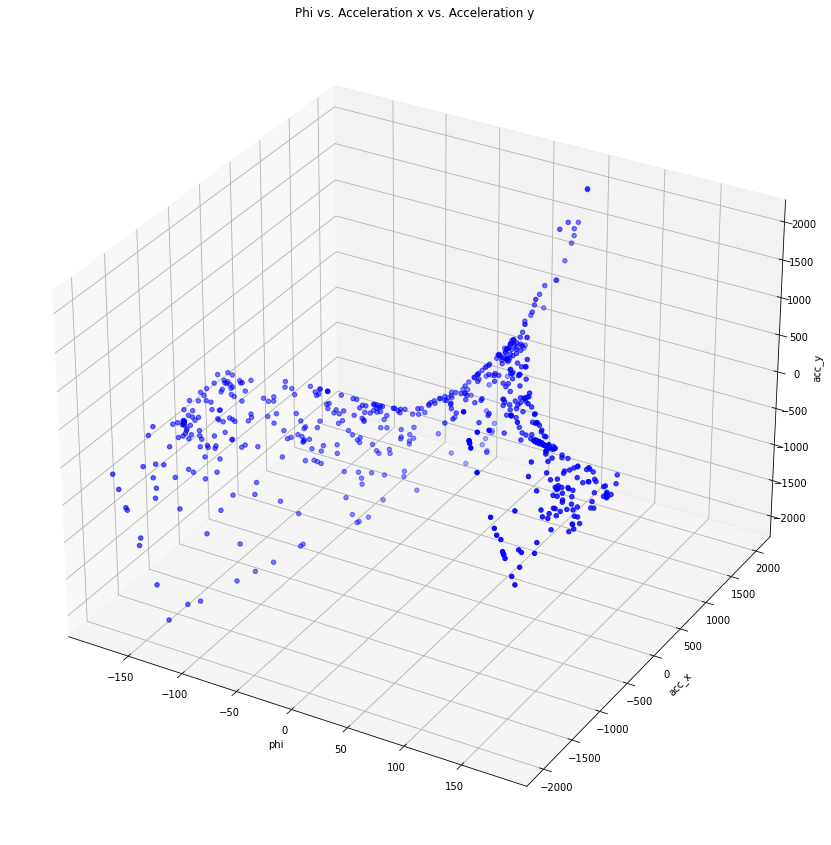

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['phi'],
           df['acc_x'],
           df['acc_y'],
           c='b')

ax.set_xlabel("phi")
ax.set_ylabel("acc_x")
ax.set_zlabel("acc_y")
plt.title("Phi vs. Acceleration x vs. Acceleration y")
plt.show()

Upon further investigation of the $\arctan$ function, we see a resemblance with the graphs above. 

<img src="https://upload.wikimedia.org/wikipedia/commons/1/16/Atan_diagram.svg" /> (Source: Wikipedia, 2021)

As a result of these graphs, a further investigation of the formulas identified the following trigometric relationships where $x$, $y$ influence the outcome of $\phi$. Hence what we are seeing in the data makes sense given the following trignometric identities.
$$
\rho = \sqrt{x^2 + y^2 + z^2}
$$
$$
\theta = \arctan \left(\frac{\sqrt{x^2 + y2}}{z} \right) = \arccos\left(\frac{z}{\sqrt{x^2 + y^2 + z^2}} \right)
$$
$$
\phi = \arctan\left(\frac{y}{z} \right) = \arccos\left( \frac{x}{\sqrt{x^2 + y^2}} \right) = \arcsin \left( \frac{y}{\sqrt{x^2 + y^2}} \right)
$$
(Source: Wikipedia, 2021)

To further see the value of this relationship, we investigate the relationship of $acc_x$ and $acc_y$ in the output of $\phi$.  In other words, can we use linear regression to identity to apply machine learning to this data. Linear regression being the simplest exploration of the machine learning. 

In [25]:
x = pd.DataFrame(np.c_[df['acc_x'], df['acc_y']], columns = ['acc_x','acc_y'])
Y = df['phi']

In [26]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 677 entries, 0 to 676
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   acc_x   677 non-null    int64
 1   acc_y   677 non-null    int64
dtypes: int64(2)
memory usage: 10.7 KB


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,
                                                    random_state=5)

In [28]:
print(x_train.shape)
print(Y_train.shape)

(473, 2)
(473,)


In [29]:
print(x_test.shape)
print(Y_test.shape)

(204, 2)
(204,)


In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)

LinearRegression()

In [31]:
phi_pred = model.predict(x_test)

### R-Squared Results

In [32]:
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))

R-squared: 0.2983


### Mean Squared Error Results

8370.151854544512


Text(0.5, 1.0, 'Actual Phi vs Predicted Phi')

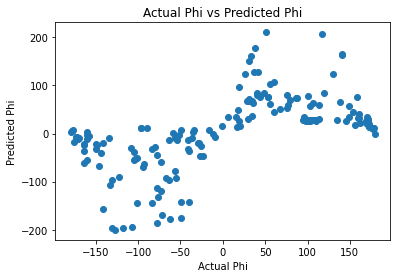

In [33]:
#%%

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, phi_pred)
print(mse)

plt.scatter(Y_test, phi_pred)
plt.xlabel("Actual Phi")
plt.ylabel("Predicted Phi")
plt.title("Actual Phi vs Predicted Phi")

### Linear Regression

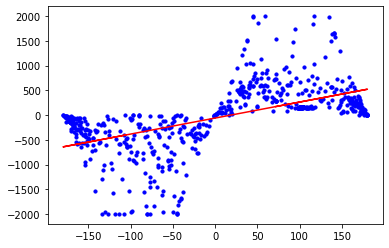

R-squared for training set: 0.3098


In [34]:
model = LinearRegression()

phi = df[['phi']].to_numpy()
y = df[['acc_y']].to_numpy()

model.fit(phi,y)

#---perform prediction---
y_pred = model.predict(phi)

#---plot the training points---
plt.scatter(phi, y, s=10, color='b')

#---plot the straight line---
plt.plot(phi, y_pred, color='r')
plt.show()

#---calculate R-squared---
print('R-squared for training set: %.4f' % model.score(phi,y))




A polynomial function of degree 1 has the following form:

$Y = \beta_0 + \beta_1 x$

Quadratic regression is a degree 2 

$Y = \beta_0 + \beta_1 x + \beta_2 x^2$

For a polynomial of degree 3, the formula is as follows:

$Y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3$

In general, a polynomial of degree n has the formula of:

$Y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \beta_n x^n$

The idea behind polynomial regression is simple — find the coefficients of the polynomial function that best fits the data. (Lee, 2019)


In [35]:

from sklearn.preprocessing import PolynomialFeatures
degree = 2

polynomial_features = PolynomialFeatures(degree = degree)



In [36]:
phi_poly = polynomial_features.fit_transform(phi)
print(phi_poly)

[[ 1.00000000e+00  7.16800000e+01  5.13802240e+03]
 [ 1.00000000e+00  7.19800000e+01  5.18112040e+03]
 [ 1.00000000e+00  7.17400000e+01  5.14662760e+03]
 ...
 [ 1.00000000e+00 -9.71300000e+01  9.43423690e+03]
 [ 1.00000000e+00 -9.71300000e+01  9.43423690e+03]
 [ 1.00000000e+00 -1.05950000e+02  1.12254025e+04]]


Plotting the linear regression

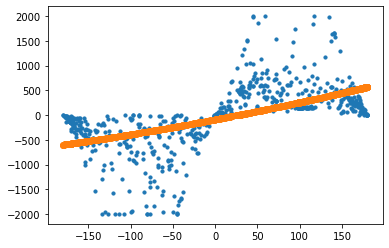

In [37]:

model = LinearRegression()
model.fit(phi_poly, y)
y_poly_pred = model.predict(phi_poly)

#---plot the points---
plt.scatter(phi, y, s=10)

#---plot the regression line---
# plt.plot(phi, y_poly_pred)
plt.scatter(phi, y_poly_pred)
plt.show()

In [38]:
print(model.intercept_)
print(model.coef_)

[-89.92899322]
[[0.00000000e+00 3.24546119e+00 2.29004312e-03]]


In [39]:
print('R-squared for training set: %.4f' % model.score(phi_poly,y))


R-squared for training set: 0.3111


For a polynomial of degree 4, the formula is as follows:

$Y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \beta_4 x^4$ 

In the following code block, a degree of 4 is specified.  This means that a fourth degree polynomial will be used to approximate the function creating the outputs of $Y$

In [40]:
degree = 4

polynomial_features = PolynomialFeatures(degree = degree)
phi_poly4 = polynomial_features.fit_transform(phi)
print(phi_poly4)

[[ 1.00000000e+00  7.16800000e+01  5.13802240e+03  3.68293446e+05
   2.63992742e+07]
 [ 1.00000000e+00  7.19800000e+01  5.18112040e+03  3.72937046e+05
   2.68440086e+07]
 [ 1.00000000e+00  7.17400000e+01  5.14662760e+03  3.69219064e+05
   2.64877757e+07]
 ...
 [ 1.00000000e+00 -9.71300000e+01  9.43423690e+03 -9.16347430e+05
   8.90048259e+07]
 [ 1.00000000e+00 -9.71300000e+01  9.43423690e+03 -9.16347430e+05
   8.90048259e+07]
 [ 1.00000000e+00 -1.05950000e+02  1.12254025e+04 -1.18933139e+06
   1.26009661e+08]]


Running the fit command, we observe the difficulty of fitting a linear regressions to the the trigometric functions

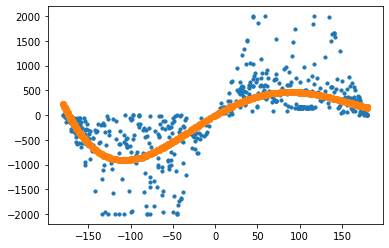

R-squared for training set: 0.5315
[[ 0.00000000e+00  9.91547583e+00 -3.38245620e-02 -3.13216222e-04
   1.23395276e-06]]


In [41]:
#%%

model = LinearRegression()
model.fit(phi_poly4, y)
y_poly_pred4 = model.predict(phi_poly4)

#---plot the points---
plt.scatter(phi, y, s=10)

#---plot the regression line---
plt.scatter(phi, y_poly_pred4)
plt.show()
print('R-squared for training set: %.4f' % model.score(phi_poly4, y))
print(model.coef_)


So why is the R-square success so low?  The fact of the matter here is that the calculation of phi is a non-linear function.  

In [42]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [43]:
X = df[['acc_y', 'acc_z']]
y = df['phi']

In [44]:
print(X.shape)
print(y.shape)

(677, 2)
(677,)


The following code cannot be used against the data.  Logistic Regression requires the data to be able to answers a yes or no question. Trigometric functions do not answer that type of binary question.   

In [45]:
logistic_regression= LogisticRegression()
# The following will not work with the data supplied in its current form.
# logistic_regression.fit(X_train,y_train)
# y_pred=logistic_regression.predict(X_test)

## Neural Network

The following will attempt results from a Neural Network

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf


print ('TensorFlow version: ' + tf.__version__)


2021-12-17 20:31:38.515701: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-17 20:31:38.515717: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


TensorFlow version: 2.7.0


For the neural network, the aspects of the calculations of phi are considered

In [47]:
x_data = pd.DataFrame(np.c_[df['acc_z'], df['acc_y']], columns = ['acc_z','acc_y'])
y_data = df['phi']


In [69]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size = 0.3,
                                                    random_state=5)                                         
np_x_train1 = x_train1.to_numpy()       
np_y_train1 = y_train1.to_numpy()      
np_x_test1 = x_test1.to_numpy()  
np_y_test1 = y_test1.to_numpy()                                  

In [70]:
# Create the model 
model = keras.Sequential()

model.add(keras.layers.Dense(units = 2, activation = 'linear', input_shape=[2]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics = ['accuracy'])

# Display the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2)                 6         
                                                                 
 dense_17 (Dense)            (None, 64)                192       
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,423
Trainable params: 4,423
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Training
model.fit( np_x_train1, np_y_train1, epochs=200, verbose=1)

Epoch 1/200
15/15 [==============================] - 0s 874us/step - loss: 1.3019e-06 - accuracy: 0.0000e+00
Epoch 2/200
15/15 [==============================] - 0s 844us/step - loss: 1.3019e-06 - accuracy: 0.0000e+00
Epoch 3/200
15/15 [==============================] - 0s 849us/step - loss: 1.3019e-06 - accuracy: 0.0000e+00
Epoch 4/200
15/15 [==============================] - 0s 869us/step - loss: 1.3019e-06 - accuracy: 0.0000e+00
Epoch 5/200
15/15 [==============================] - 0s 928us/step - loss: 1.3019e-06 - accuracy: 0.0000e+00
Epoch 6/200
15/15 [==============================] - 0s 982us/step - loss: 1.3019e-06 - accuracy: 0.0000e+00
Epoch 7/200
15/15 [==============================] - 0s 831us/step - loss: 1.3019e-06 - accuracy: 0.0000e+00
Epoch 8/200
15/15 [==============================] - 0s 846us/step - loss: 1.3019e-06 - accuracy: 0.0000e+00
Epoch 9/200
15/15 [==============================] - 0s 802us/step - loss: 1.3019e-06 - accuracy: 0.0000e+00
Epoch 10/200
15/15 

In [72]:
y_predicted = model.predict(np_x_test1)




It is apparent from the results that underfitting is occuring

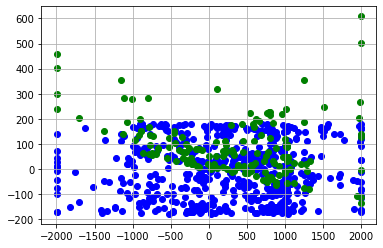

In [76]:
# Display the result
plt.scatter(df['acc_z'], df['phi'], color='b')
plt.scatter(x_test1['acc_z'], y_predicted, color='g')
plt.grid()
plt.show()

## References
Lee, W.-M. (2019). Python Machine Learning. Wiley.

